# Spam_Detection_Model

### Importing necessary libraries

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

### Loading the dataset

In [68]:
df = pd.read_csv('spam.csv', encoding='latin-1')


### Data Cleaning and Preprocessing

In [69]:
df.columns


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [70]:
df.drop(columns=['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'], inplace=True)


In [71]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ?_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [72]:
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [73]:
df.dtypes


label      object
message    object
dtype: object

In [74]:
df.info

<bound method DataFrame.info of      label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will ?_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [75]:
df.shape 

(5572, 2)

In [77]:
df.size

11144

In [78]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

### Handling missing values and duplicates

In [79]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [80]:
df.duplicated().sum()

403

In [81]:
df = df.drop_duplicates(keep='first')

In [82]:
df.duplicated().sum()

0

In [83]:
label_counts = df['label'].value_counts()
print("Count of labels:")
print(label_counts)

Count of labels:
label
0    4516
1     653
Name: count, dtype: int64


### Data Visualization

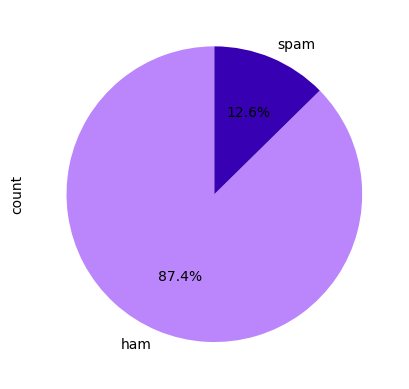

In [84]:
colors = ['#bb86fc', '#3700b3'] 
label_counts.plot.pie(autopct='%1.1f%%', startangle=90, labels=['ham', 'spam'], colors=colors)
plt.show()

### Model Selection and Training

###### using the Naive Bayes classifier, specifically the Multinomial Naive Bayes model, for building the email spam detector. 
###### This version of the Naive Bayes classifier designed for classification with discrete features, such as word counts for text classification. 
###### It's particularly suited for text data where the features represent frequencies of terms or occurrences

In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

In [25]:
# Convert the text data to numerical data
vectorizer = TfidfVectorizer(stop_words='english')
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)


In [26]:
# Training the model
model = MultinomialNB()
model.fit(X_train_transformed, y_train)


MultinomialNB()

In [27]:
# Predicting the labels for the test set
y_pred = model.predict(X_test_transformed)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Displaying the classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       1.00      0.76      0.86       145

    accuracy                           0.97      1034
   macro avg       0.98      0.88      0.92      1034
weighted avg       0.97      0.97      0.96      1034



### Evaluating te model

In [35]:
sample_emails = [
    "Congratulations! You've won a free ticket to the Bahamas. Reply YES to claim.",
    "Hi, can we reschedule our meeting to next week?",
    "You've been selected for a $1000 Walmart gift card. Click here to claim now."
]

# Transforming the sample emails using the vectorizer
sample_emails_transformed = vectorizer.transform(sample_emails)

# Predicting the labels for the sample emails
predictions = model.predict(sample_emails_transformed)

for email, label in zip(sample_emails, predictions):
    print(f'Email: {email}\nLabel: {"Spam" if label else "Ham"}\n')


Email: Congratulations! You've won a free ticket to the Bahamas. Reply YES to claim.
Label: Spam

Email: Hi, can we reschedule our meeting to next week?
Label: Ham

Email: You've been selected for a $1000 Walmart gift card. Click here to claim now.
Label: Spam

